In [4]:
import os
os.environ["OMP_NUM_THREADS"] = "1" 
os.environ["MKL_NUM_THREADS"] = "1" 

from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Laddar upp csv-fil 'wholesale_customerdata' 
customer_data = pd.read_csv('Wholesale customers data.csv')

In [6]:
customer_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


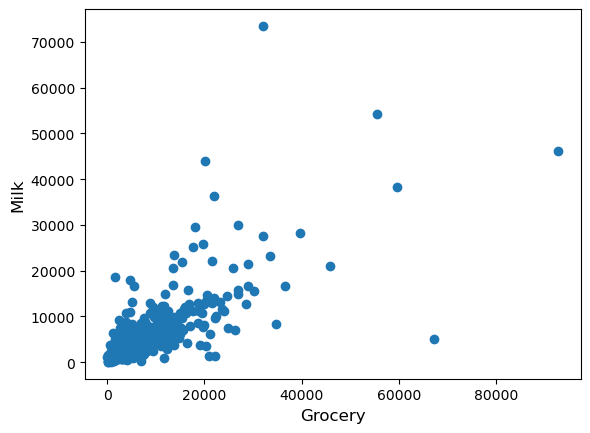

In [60]:
plt.scatter(customer_data.iloc[:,4].values, customer_data.iloc[:,3].values)
plt.xlabel("Grocery", size=12)
plt.ylabel("Milk", size=12)
plt.show()

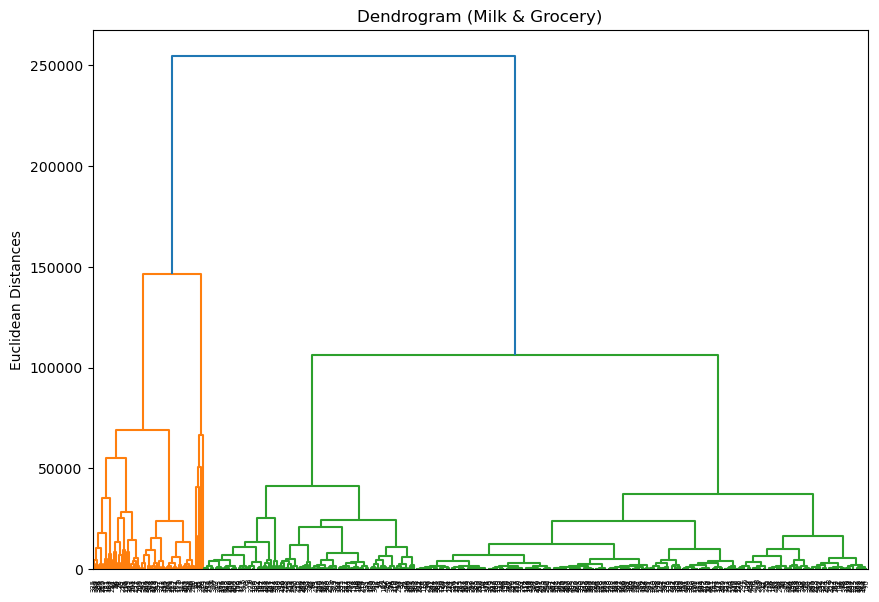

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# 1. HÄR DEFINIERAR VI X (Milk & Grocery)
# index 3 = Milk, index 4 = Grocery
X = customer_data.iloc[:, [3, 4]].values

# 2. SKAPA LÄNKEN
# Vi byter 'single' mot 'ward' för att få tydligare kluster
linked = linkage(X, method='ward')

# 3. RITA DENDROGRAMMET
plt.figure(figsize=(10, 7))
plt.title("Dendrogram (Milk & Grocery)")

dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True) # Jag tog bort 'labels=' så slipper du felmeddelanden

plt.ylabel("Euclidean Distances")
plt.show()